In [ ]:
#Titanic Survival Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Display the first few rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values in 'Age' with the mean age
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill missing values in 'Embarked' with the most common value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column as it has many missing values
df.drop('Cabin', axis=1, inplace=True)

# Drop irrelevant columns
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Convert categorical columns to numerical
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Display the first few rows of the processed dataset
df.head()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [4]:
# Define features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data
X_test = scaler.transform(X_test)


In [6]:
# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)


LogisticRegression()

In [60]:
#accuracy on training data
X_train_prediction = model.predict(X_train)

In [61]:
print(X_train_prediction)

[0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1
 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1
 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 0 1 0 0 1 0 0 0 0 1 

In [62]:
X_test_prediction = model.predict(X_test)

In [63]:
print(X_test_prediction)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


In [7]:
# Make predictions
y_pred = model.predict(X_test)


In [8]:
# Print accuracy score
print('Accuracy Score:', accuracy_score(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

# Print classification report
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy Score: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [11]:
 #to check shape of data(in terms of rows & columns)
df.shape

(891, 9)

In [ ]:
#Data Analysis

In [24]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [26]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
#checking information from data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


In [ ]:
#Data Visualisation with Graphs

In [14]:
sns.set()

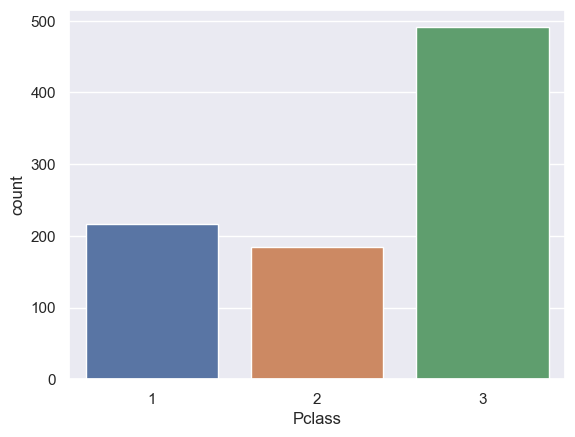

In [19]:
sns.countplot(x='Pclass', data=df)
plt.show()


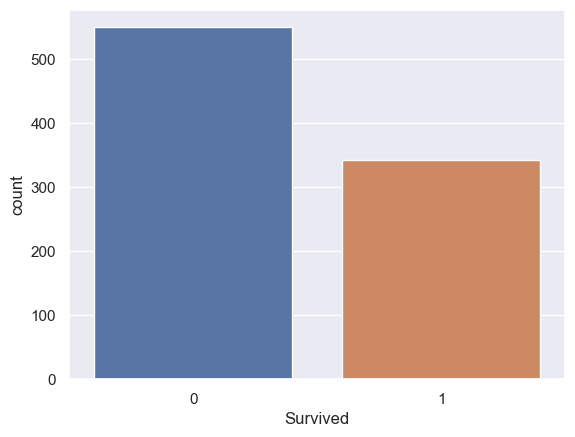

In [20]:
sns.countplot(x='Survived', data=df)
plt.show()

In [ ]:
#Numerical attributes

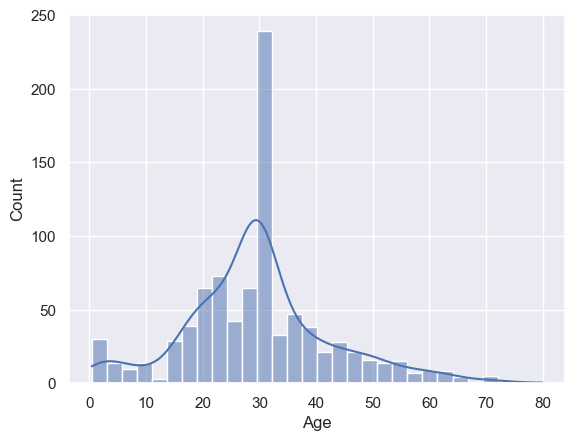

In [43]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values in 'Age' column
df.dropna(subset=['Age'], inplace=True)

# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

# Using histplot to plot the distribution of 'Age'
sns.histplot(df['Age'], kde=True)
plt.show()


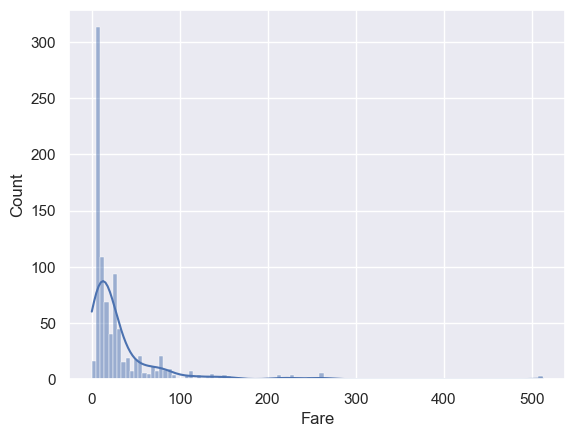

In [45]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values in 'Age' and 'Fare' columns
df.dropna(subset=['Age', 'Fare'], inplace=True)

# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

# Using histplot to plot the distribution of 'Fare'
sns.histplot(df['Fare'], kde=True)
plt.show()


In [ ]:
#HeatMap to check correlation

<Axes: >

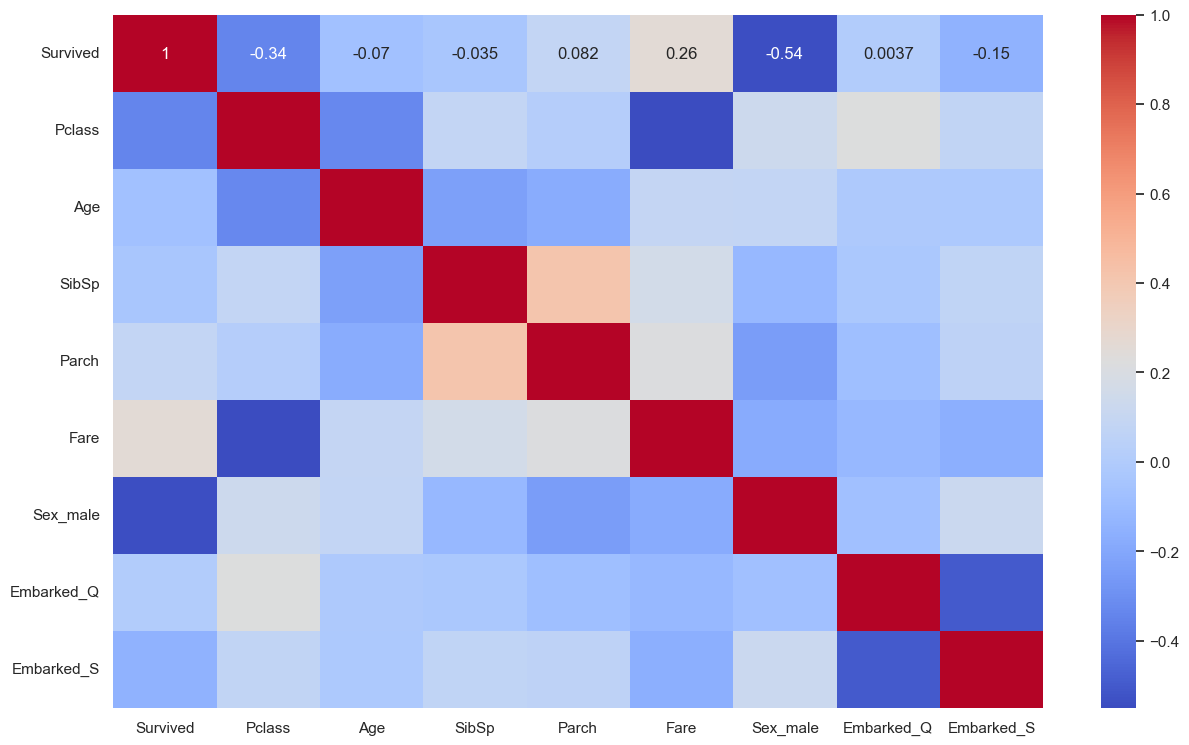

In [46]:
corr = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [47]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [49]:
#Encoding Label

In [51]:
import pandas as pd

# Assuming df is your DataFrame
# Print column names to check for 'Sex' column
print(df.columns)

# Print first few rows to inspect data
print(df.head())

# Strip any leading/trailing spaces from column names
df.rename(columns=lambda x: x.strip(), inplace=True)

# Check again for 'Sex' column and print value counts
if 'Sex' in df.columns:
    print(df['Sex'].value_counts())
else:
    print("Column 'Sex' not found in DataFrame.")


Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  
Column 'Sex' not found in DataFrame.


In [54]:
#Test_Split

In [56]:
import pandas as pd

# Print all column names to check for 'PassengerId' and 'Survived'
print(df.columns)

# Check if 'PassengerId' and 'Survived' exist in the DataFrame
columns_to_drop = []
if 'PassengerId' in df.columns:
    columns_to_drop.append('PassengerId')
if 'Survived' in df.columns:
    columns_to_drop.append('Survived')

# Drop the columns if they exist
X = df.drop(columns=columns_to_drop, axis=1)

# Separate the target variable if 'Survived' column exists
if 'Survived' in df.columns:
    Y = df['Survived']
else:
    Y = None  # Handle accordingly if 'Survived' is not found

print(X.head())
print(Y.head() if Y is not None else "Survived column not found.")


Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')
   Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0       3  22.0      1      0   7.2500      True       False        True
1       1  38.0      1      0  71.2833     False       False       False
2       3  26.0      0      0   7.9250     False       False        True
3       1  35.0      1      0  53.1000     False       False        True
4       3  35.0      0      0   8.0500      True       False        True
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [57]:
print(X)

     Pclass        Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         3  22.000000      1      0   7.2500      True       False   
1         1  38.000000      1      0  71.2833     False       False   
2         3  26.000000      0      0   7.9250     False       False   
3         1  35.000000      1      0  53.1000     False       False   
4         3  35.000000      0      0   8.0500      True       False   
..      ...        ...    ...    ...      ...       ...         ...   
886       2  27.000000      0      0  13.0000      True       False   
887       1  19.000000      0      0  30.0000     False       False   
888       3  29.699118      1      2  23.4500     False       False   
889       1  26.000000      0      0  30.0000      True       False   
890       3  32.000000      0      0   7.7500      True        True   

     Embarked_S  
0          True  
1         False  
2          True  
3          True  
4          True  
..          ...  
886        True  
887

In [58]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


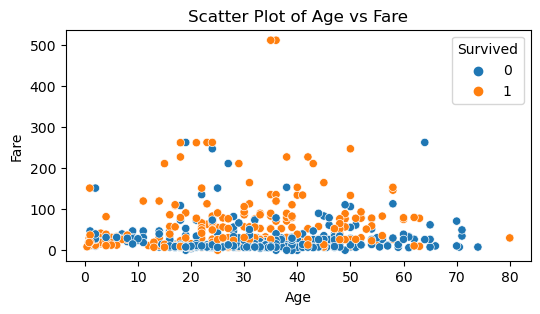

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Titanic-Dataset.csv')
plt.figure(figsize=(6, 3))
sns.scatterplot(data=df, x="Age", y="Fare", hue="Survived")
plt.title("Scatter Plot of Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived")
plt.show()
